first the file is a pickle type which means that it can be unpacked
<br>
The main goal i see is to find a representation that has convex clusters as that would be the limitation of attempting a clustering.

<br>

wafer defects Center, Donut, Edge-Loc, Edge-Ring, Loc, Random, Scratch, Near-full, none.

In [1]:
# import numpy, pandas, sklearn for k-means and pca


import numpy as np
import pandas as pd
import sklearn
import pickle
import matplotlib.pyplot as plt
import umap
import cv2

#from sklearn.datasets import load_digits

In [2]:

# #debug test (seems like the shape of the data is wrong)
# digits = load_digits()
# print(digits.data,digits.data.shape)
# model = umap.UMAP()
# embedding = model.fit_transform(digits.data)

# plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
# plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
# plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [3]:
# import the data from pickle
src = "./data/LSWMD.pkl"
data=pd.read_pickle(src)


# clean the label data as I would be using it for getting a subset
def clean(x):
    if(len(x) == 0):
        return ""
    else:
        return x[0][0]

def replacecolumn(column):
    newcolumn = []
    for entry in column:
        if(len(entry)==0):
            entry = ""
        else:
            entry = entry[0][0]
        newcolumn.append(entry)
    return newcolumn

collabel = replacecolumn(data["trianTestLabel"])
colfailure

data["trianTestLabel"] = collabel

first the simplest model would be to try to see if the data is linearly seperable. 
So the first thing to try is to see 2d projections of the data to see if they is some inherent clusters.
<br>

since the task is to find an unsupervised method to cluster even though the data seems to be supervised.
The most naive way would be to try K-means or EM in order to cluster. Since the clustering requires a known number of clusters, the naive way was to use the number of clusters as failure types. 
<br>

seems like the wafer map is an image so a CNN might be needed. that doesn't make sense as that is going the supervised learning route.

what about segmentation of the wafer map?

In [4]:
print(data["trianTestLabel"][0])
print(data.columns)

Training
Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'],
      dtype='object')


In [13]:
# debugging dataframe
#for index, row in data.iterrows():
   #print(index)
print(data["trianTestLabel"][800000],data["failureType"][800000]) #[0],entry[2].shape,entry[5],entry[7],entry[9],entry[13])
#    print("\n") 

Test [['none']]


the columns of the data are 'waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'
       
size of the wafer is a consistant 2160 size and 45 by 48 shape. (wrong assumption!!!)

need to fetch an example of each type of defect 


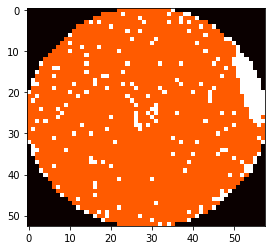

(53, 58) [['Edge-Loc']]


In [6]:
num = 38
# 38(edge-loc),40(loc),44(center),46(none), 161(), 186(edge-ring)
a = data["waferMap"][num]
b = data["failureType"][num]
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()
print(a.shape,b)

based on the cell it seems like a good wafer is all zeros

edge-loc seems to be both 


it seems like the cluster space for some cases is not linear. Thus PCA wouldn't be a good represenation either as it depends on linear eigenvalues.
<br>
maybe they could be a meaningful cluster representation of using U-Map or tsne which are non-linear embeddings

The noise might need to have a salt and pepper filter.
<br>

the wafers are of different sizes

In [7]:
# resize wafermaps for uniformity (lets try 32 by 32)
subdata = data[data['trianTestLabel'] == "Test"] #data cleaning of [["Training"]]-> "Training" needed

waferdata = subdata["waferMap"]

size = (16,16)
newwaferdata = []
for idx,wafer in enumerate(waferdata):
    wafer = cv2.medianBlur(wafer, 3)
    wafer = cv2.resize(wafer, dsize=size, interpolation=cv2.INTER_CUBIC)
    #print(wafer.shape)
    #wafer = np.array(wafer).reshape(size[0]*size[1])
    newwaferdata.append(wafer)

newwaferdata = np.array(newwaferdata)
print(newwaferdata.shape,newwaferdata[0].shape)
   

(118595, 16, 16) (16, 16)


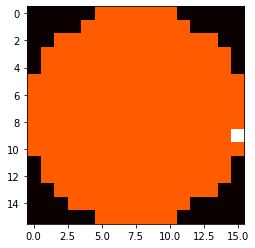

(16, 16)


In [8]:
num = 186
# 38(edge-loc),40(loc),44(center),46(none), 161(), 186(edge-ring), 811427(scratch), 811448(Edge-Ring)
a = newwaferdata[num]
b = data["failureType"]
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()
print(a.shape)

#the median filter removed the salt and pepper noise
# edge ring seems to lose form under the 5 median filter

In [9]:
# umap
length = newwaferdata.shape[0]
#print(type(waferarr), waferarr[200].shape)
#waferdata.shape = (length, -1) #np.array(waferdata).reshape((length,size[0]*size[1]))


newwaferdata = newwaferdata.reshape((length,size[0]*size[1]))

print(newwaferdata,newwaferdata.shape)
#print(umap)
model = umap.UMAP()
umapdata = model.fit_transform(newwaferdata)
#811456
# try a subset, which means the test set would be useful to fetch the subset while having each type of wafer

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (118595, 256)


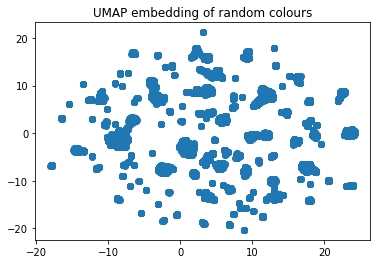

In [11]:
plt.scatter(umapdata[:,0], umapdata[:,1],c = ) #, c=newwaferdata)
plt.title('UMAP embedding of random colours');

#the clustering doesn't seem promising for finding data behavior

In [ ]:
# k-means
# because of the catagories, assume 9 clusters
kmeans = KMeans(n_clusters=9, random_state=0)
clusters = kmeans.fit_transform(umapdata)

In [ ]:
#kmeans plotting


sources used
https://docs.python.org/3/library/pickle.html
https://stackoverflow.com/questions/33127866/how-to-pickle-and-unpickle


error with pickle
https://stackoverflow.com/questions/37371451/importerror-no-module-named-pandas-indexes

dacs for dataframe
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas


the wafermap needs visualization of a heat map
https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib

check umap representation: https://umap-learn.readthedocs.io/en/latest/

get the pandas dataframe row to numpy for umap to work https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html
https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe

rescale wafermap
https://stackoverflow.com/questions/48121916/numpy-resize-rescale-image

https://stackoverflow.com/questions/9057379/correct-and-efficient-way-to-flatten-array-in-numpy-in-python


fix shape issue
https://stackoverflow.com/questions/48823400/pandas-series-to-2d-array
https://towardsdatascience.com/get-into-shape-14637fe1cd32
https://stackoverflow.com/questions/40824601/how-to-convert-a-series-of-arrays-into-a-single-matrix-in-pandas-numpy


median filter
https://medium.com/@florestony5454/median-filtering-with-python-and-opencv-2bce390be0d1 
https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html


sklearn k-means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

dataframe fetch test subset
https://stackoverflow.com/questions/36307609/how-can-i-select-data-from-a-table-with-specific-attribute-with-pandas 

dataframe reading bug (might need to use apply)
https://www.kite.com/python/answers/how-to-modify-all-the-values-in-a-pandas-dataframe-column-in-python

slowness in apply
https://stackoverflow.com/questions/38697404/pandas-explanation-on-apply-function-being-slow
https://ys-l.github.io/posts/2015/08/28/how-not-to-use-pandas-apply/


AttributeError: 'NNDescent' object has no attribute 'neighbor_graph'
https://github.com/lmcinnes/umap/issues/403 (seems like enviroment issues)
<br>

jupyter lab is the new thing.

<br>
fix package llvmlight https://github.com/NVIDIA/NeMo/issues/841
